# Data Visualisation Guide


## Introduction

In this chapter, we'll examine the tricks and techniques that will make your data visualisations sing.

First, let's import the packages we'll need.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotnine import (
    options,
    geom_tile,
    scale_size,
    scale_x_continuous,
    scale_y_continuous,
    ggplot,
    geom_point,
    aes,
    ggtitle
)
from plotnine.scales import scale_fill_brewer

# Set seed for reproducibility
np.random.seed(10)
# Set max rows displayed for readability
pd.set_option("display.max_rows", 6)
# Plot settings
plt.style.use(
    "https://github.com/aeturrell/coding-for-economists/raw/main/plot_style.txt"
)

## The Different Types of Visualisation

It's useful to think about three different kinds, or levels, of visualisation:

- exploratory

- scientific

- narrative

The first, exploratory visualisation, is the kind that you do when you're looking and data and trying to understand it. Just plotting the data is a really good strategy for getting a feel for any issues there might be. This is perhaps most famously demonstrated by *Anscombe's quartet*: four different datasets with the same mean, standard deviation, and correlation but *very* different data distributions.

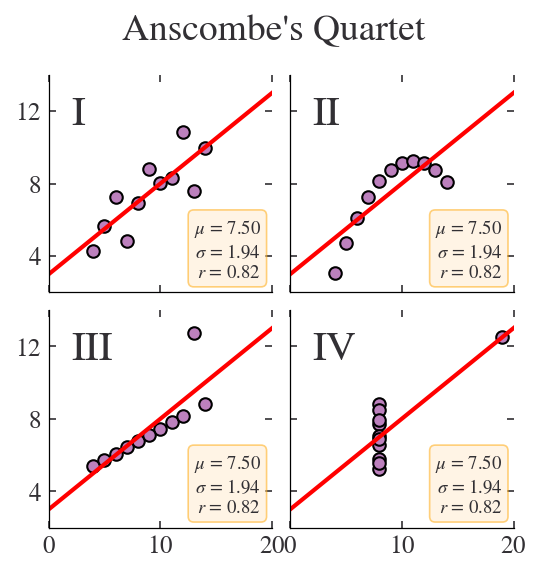

In [6]:
#TODO hide input
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(4, 4),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)  # slope, intercept
    ax.axline(xy1=(0, p0), slope=p1, color='r', lw=2)

    # add text box for the statistics
    stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
             f'$\\sigma$ = {np.std(y):.2f}\n'
             f'$r$ = {np.corrcoef(x, y)[0][1]:.2f}')
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    ax.text(0.95, 0.07, stats, fontsize=9, bbox=bbox,
            transform=ax.transAxes, horizontalalignment='right')

plt.suptitle("Anscombe's Quartet")
plt.show()

Exploratory visualisation is usually quick and dirty, and flexible too. Some exploratory data viz can be automated, and some of the packages we saw in the chapter on {ref}`exploratory-data-analysis` can do this. For an EDA package that's explicitly built with visalisation in mind, check out [SweetViz](https://github.com/fbdesignpro/sweetviz). Beyond you and perhaps your co-authors/collaborators, not many other people should be seeing your exploratory visualisation.

The second kind, scientific visualisation, is the prime cut of your exploratory visualisation. It's the kind of plot you might include in a more technical paper, the picture that says a thousand words. I often think of the first image of a black hole {cite}`akiyama2019first` as a prime example of this. You can get away with having a high density of information in a scientific plot and, in short format journals, you may need to. The journal *Physical Review Letters*, which has an 8 page limit, has a classic of this genre in more or less every issue. Ensuring that important values can be accurately read from the plot is especially important in these kinds of charts.

The third and final kind is narrative visualisation. This is the one that requires the most thought in the step where you go from the first view to the end product. It's a visualisation that doesn't just show a picture, but gives an insight. These are the kind of visualisations that you might see in the *Financial Times*, *The Economist*, or on the BBC News website. They come with aids that help the viewer focus on the aspects that the creator wanted them to (you can think of these aids or focuses as doing for visualisation what bold font does for text). They're well worth using in your work, especially if you're trying to communicate a particular narrative, and especially if the people you're communicating with don't have deep knowledge of the topic. You might use them in a paper that you hope will have a wide readership, in a blog post summarising your work, or in a report intended for a policymaker.

## Narrative Data Visualisation

As discussed, the name of the game here is to communicate a particular narrative. Let's see what tricks we can use to help do this.

### Drawing Attention to Enhance Narrative Visualisation

According to data visualisation master Jon Schwabish's book *Better Data Visusalizations* {cite}`schwabish2021better`, there are 16 ways to draw an audience's attention in a chart:

1. Shape
2. Enclosure
3. Line width
4. Saturation
5. Colour
6. Size
7. Markings
8. Orientation
9. Position
10. Sharpness
11. Connection
12. Length
13. 3D
14. Curvature
15. Density
16. Closure

![Preattentive Visual Processing, by @jschwabish.](https://github.com/aeturrell/coding-for-economists/raw/main/img/preattentive.jpg) The different ways to trigger preattentive visual processing, by @jschwabish.

But be warned: not all of these are equivalent! It's much easier to perceive differences in length than it is differences in, say, volume. So if you want your audience to be able to make comparisons or quantitative assessments, you need to pick what techniques you use from this list carefully. Roughly in order of how easy they are to perceive quantitatively, the features are: one common axis, two axes, length, slope, angle, parts of whole, area, volume, saturation, and hue.

**Shape**

Shape can draw the eye. One good example of this is a bubble chart, which is a scatter plot (and so has x and y dimensions) that encodes another dimension through the size of the circles used to denote the location in the x-y plane. The most famous examples are probably the gapminder charts as popularised by Prof Hans Rosling.

But another good example is the Treemap. The example bleow, different continents are shown in proportion to their population and we very quickly see that Asia contains most of the world's population.

In [ ]:
# World Bank CO2 emissions (metric tons per capita)
# https://data.worldbank.org/indicator/EN.ATM.CO2E.PC
# World Bank pop
# https://data.worldbank.org/indicator/SP.POP.TOTL
# country and region codes at http://api.worldbank.org/v2/country
from pandas_datareader import wb
df = wb.download(indicator='EN.ATM.CO2E.PC',
                  country=['US', 'CHN', 'IND', 'Z4', 'Z7'],
                  start=2017, end=2017)
df
 
# create dataset
df = pd.DataFrame()

height = [3, 12, 5, 18, 45]
bars = ('A', 'B', 'C', 'D', 'E')

# Choose the width of each bar and their positions
width = [0.1,0.2,3,1.5,0.3]
x_pos = [0,0.3,2,4.5,5.5]
 
# Make the plot
plt.bar(x_pos, height, width=width)

# Create names on the x-axis
plt.xticks(x_pos, bars)
 
# Show graphic
plt.show()

/Users/aet/opt/anaconda3/envs/codeforecon/lib/python3.8/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: Z4, Z7


,,EN.ATM.CO2E.PC
country,year,
China,2017,7.225769
East Asia & Pacific,2017,6.237253
Europe & Central Asia,2017,6.721800
India,2017,1.719190
United States,2017,14.805882


### 2. Enclosure

An enclosure is something that wraps around something else. We'll do an enclosure around some special bars within a bar chart to demonstrate this, making use of the barley data from the **vega_datasets** package (part of another visualization library).

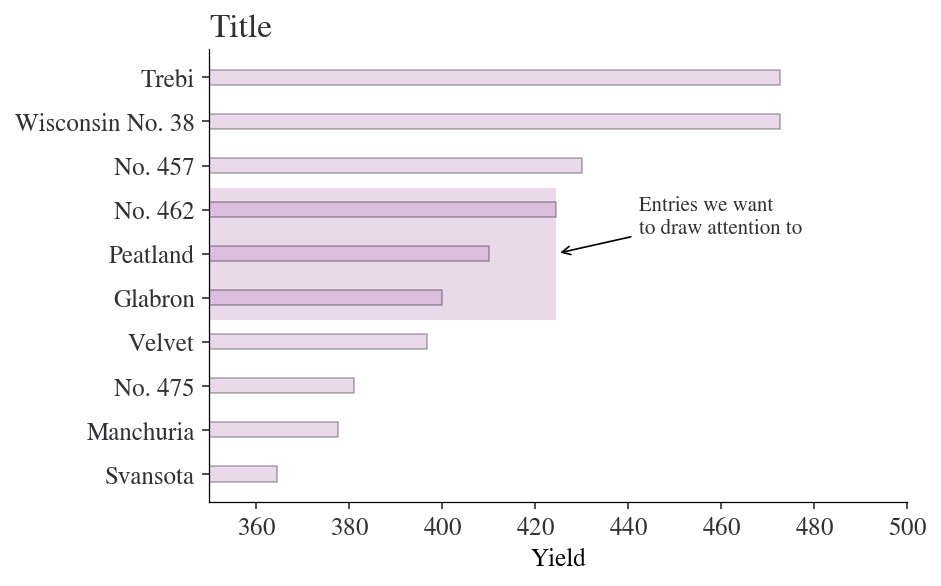

In [3]:
from vega_datasets import data

# Grab data
barley = data.barley()
barley = pd.DataFrame(barley.groupby(["variety"])["yield"].sum())
barley = barley.sort_values(by="yield")

# Decide on special entries
relevant_entries = ["Peatland", "Glabron", "No. 462"]
# Find key properties of special entries to enclose: we need the 
# bottom and the width of rectangle
min_pos = min([barley.index.get_loc(x) for x in relevant_entries])
max_yield = barley.loc[relevant_entries, "yield"].max()

# plot standard bar chart
fig, ax = plt.subplots()
ax.barh(barley["yield"].index, barley["yield"], 0.35, zorder=2, alpha=0.3)
# add rectangle to **enclose** special values
left, bottom, width, height = (0, min_pos-0.5, max_yield, len(relevant_entries))
rect = plt.Rectangle((left, bottom), width, height,
                    alpha=0.3, zorder=1, lw=0)
ax.add_patch(rect)
# Add text to explain enclosure
ax.annotate('Entries we want \nto draw attention to',
            xy=(max_yield, min_pos+len(relevant_entries)//2),
            xycoords='data',
            xytext=(40, 10),
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))
# Tidy up plot
ax.set_xlim(350, None)
ax.set_xlabel("Yield")
ax.set_title("Title")
plt.show()

### 3. Line Width

For this one, let's get the productivity per worker of several developed nations.





In [4]:
import pandasdmx as pdmx

# Get productivity data for select countries since 2010
oecd = pdmx.Request('OECD')
data = oecd.data(resource_id='PDB_LV', key='GBR+FRA+CAN+ITA+DEU+JPN+USA.T_GDPHRS.CPC/all?startTime=2010').to_pandas()
df = pd.DataFrame(data).reset_index()
# Renormalise to 2014:
loc_vals_2014 = df.loc[df["TIME_PERIOD"]=="2014", ["value", "LOCATION"]]
loc_vals_2014 = loc_vals_2014.set_index("LOCATION").to_dict()["value"]
df["value"] = df.apply(lambda x: 100*x["value"]/loc_vals_2014[x["LOCATION"]], axis=1)
df.head()

,LOCATION,SUBJECT,MEASURE,TIME_PERIOD,value
0,CAN,T_GDPHRS,CPC,2010,87.763222
1,CAN,T_GDPHRS,CPC,2011,90.706798
2,CAN,T_GDPHRS,CPC,2012,91.659862
3,CAN,T_GDPHRS,CPC,2013,96.081834
4,CAN,T_GDPHRS,CPC,2014,100.000000


Now let's plot all of the countries but highlight just one, for Japan, to be different via its line width.

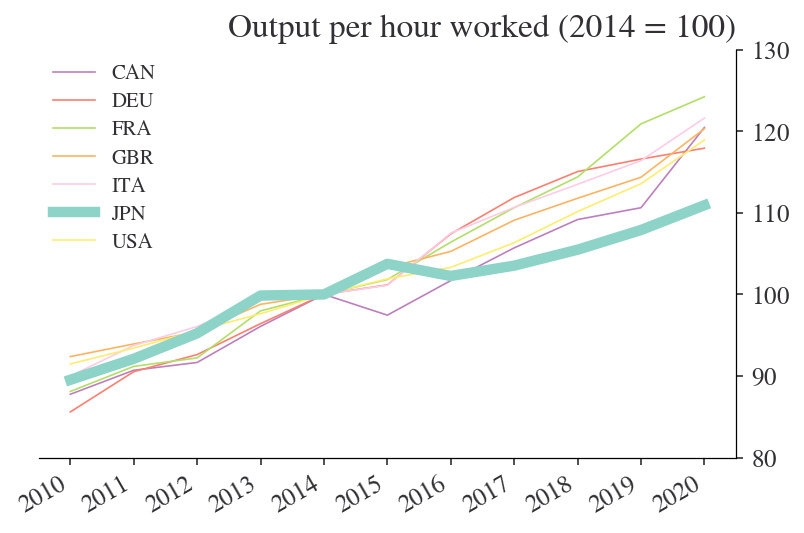

In [7]:
fig, ax = plt.subplots()
for i, country in enumerate(df["LOCATION"].unique()):
    df_sub = df[df["LOCATION"] == country]
    if(country!="JPN"):
        linewidth = 0.8
        zorder=1
    else:
        linewidth = 5
        zorder=2
    ax.plot(df_sub["TIME_PERIOD"], df_sub["value"], label=country, lw=linewidth,
            zorder=zorder)
ax.set_title("Output per hour worked (2014 = 100)", loc="right")
ax.yaxis.tick_right()
fig.autofmt_xdate()
ax.spines["right"].set_visible(True)
ax.spines["left"].set_visible(False)
ax.legend(frameon=False)
plt.show()

## 4. Saturation

Saturation is a parameter that controls how intense colours appear. High saturation colours are more vivid. The easiest way to influence saturation in **matplotlib** is to the change the parameter `alpha`, which actually controls transparency. Setting it to zero means that you won't be able to see the feature it relates to at all. You should also note that some types of graphics do not support transparency, for example .eps files: encapsulated postscript, sometimes required by journals for figures.